In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.patches import Patch
import os
import seaborn as sns
import brewer2mpl
from collections import namedtuple, defaultdict
DataPoint = namedtuple("DataPoint", "min,mean,median,max,sd")

mpl.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
bmap = brewer2mpl.get_map('Set2', 'qualitative', 8)

bmap_len = 7
# fifo = bmap.mpl_colors[bmap_len-0]
# edf = bmap.mpl_colors[bmap_len-2]
# graphene = bmap.mpl_colors[bmap_len-4]
# tetrisched = bmap.mpl_colors[bmap_len-5]
# dagsched = bmap.mpl_colors[bmap_len-6]

viridis = mpl.colormaps.get_cmap('viridis')
colors = viridis(np.linspace(0, 1, 5))
fifo, edf, graphene, dagsched, tetrisched = colors

/opt/homebrew/Caskroom/miniforge/base/envs/dsched_plots/lib/python3.10/site-packages/brewer2mpl/brewer2mpl.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_string


In [5]:
slo_sweep = {
    "FIFO": {
        5: [127, 86, 110],
       10: [134, 93, 112],
       25: [157, 94, 118],
       50: [182, 94, 131],
      100: [200, 95, 175],  
      200: [269, 145, 310],  
    },
    "EDF": {
        5: [778, 746, 789],
       10: [805, 760, 801],
       25: [839, 791, 842],
       50: [851, 823, 856],
      100: [874, 830, 896],  
      200: [900, 841, 933],  
    },
    "TetriSched": {
        5: [780, 734, 775],
       10: [791, 758, 792],
       25: [839, 793, 827],
       50: [873, 826, 859],
      100: [892, 850, 872],  
      200: [904, 865, 902],  
    },
    "Graphene": {
        5: [473, 493, 504],
       10: [476, 523, 543],
       25: [566, 596, 606],
       50: [653, 651, 704],
      100: [711, 723, 728],  
      200: [762, 764, 811],  
    },
    "DAGSched": {
        5: [914, 886, 921],
       10: [907, 901, 902],
       25: [928, 916, 929],
       50: [936, 915, 931],
      100: [944, 923, 947],  
      200: [950, 935, 915],  
    },
}
def getDataPoint(np_array):
    return DataPoint(
        min=np.min(np_array),
        mean=np.mean(np_array),
        median=np.median(np_array),
        max=np.max(np_array),
        sd=np.std(np_array, ddof=1))

slo_sweep_miss_rate_datapoints = {}
slo_sweep_attainment_datapoints = {}

for scheduler, datapoints in slo_sweep.items():
    slo_sweep_miss_rate_datapoints[scheduler] = {}
    slo_sweep_attainment_datapoints[scheduler] = {}
    for slo, slo_datapoints in datapoints.items():
        slo_miss_rate_datapoints = 100 - (np.array(slo_datapoints) / 10)
        slot_attainment_datapoints = (np.array(slo_datapoints) / 10)
        slo_sweep_miss_rate_datapoints[scheduler][slo] = getDataPoint(slo_miss_rate_datapoints)
        slo_sweep_attainment_datapoints[scheduler][slo] = getDataPoint(slot_attainment_datapoints)

In [6]:
slo_sweep_miss_rate_datapoints

{'FIFO': {5: DataPoint(min=np.float64(87.3), mean=np.float64(89.23333333333333), median=np.float64(89.0), max=np.float64(91.4), sd=np.float64(2.0599352740640544)),
  10: DataPoint(min=np.float64(86.6), mean=np.float64(88.7), median=np.float64(88.8), max=np.float64(90.7), sd=np.float64(2.0518284528683233)),
  25: DataPoint(min=np.float64(84.3), mean=np.float64(87.69999999999999), median=np.float64(88.2), max=np.float64(90.6), sd=np.float64(3.179622619116928)),
  50: DataPoint(min=np.float64(81.8), mean=np.float64(86.43333333333332), median=np.float64(86.9), max=np.float64(90.6), sd=np.float64(4.418521623046935)),
  100: DataPoint(min=np.float64(80.0), mean=np.float64(84.33333333333333), median=np.float64(82.5), max=np.float64(90.5), sd=np.float64(5.484827557301444)),
  200: DataPoint(min=np.float64(69.0), mean=np.float64(75.86666666666666), median=np.float64(73.1), max=np.float64(85.5), sd=np.float64(8.590886644190654))},
 'EDF': {5: DataPoint(min=np.float64(21.099999999999994), mean=np

In [7]:
slo_sweep_attainment_datapoints

{'FIFO': {5: DataPoint(min=np.float64(8.6), mean=np.float64(10.766666666666666), median=np.float64(11.0), max=np.float64(12.7), sd=np.float64(2.05993527406405)),
  10: DataPoint(min=np.float64(9.3), mean=np.float64(11.300000000000002), median=np.float64(11.2), max=np.float64(13.4), sd=np.float64(2.051828452868319)),
  25: DataPoint(min=np.float64(9.4), mean=np.float64(12.300000000000002), median=np.float64(11.8), max=np.float64(15.7), sd=np.float64(3.1796226191169286)),
  50: DataPoint(min=np.float64(9.4), mean=np.float64(13.566666666666668), median=np.float64(13.1), max=np.float64(18.2), sd=np.float64(4.418521623046936)),
  100: DataPoint(min=np.float64(9.5), mean=np.float64(15.666666666666666), median=np.float64(17.5), max=np.float64(20.0), sd=np.float64(5.484827557301445)),
  200: DataPoint(min=np.float64(14.5), mean=np.float64(24.133333333333336), median=np.float64(26.9), max=np.float64(31.0), sd=np.float64(8.590886644190652))},
 'EDF': {5: DataPoint(min=np.float64(74.6), mean=np.f

In [10]:
def plot(datapoint_collection):
    x_axis_points = list(sorted(datapoint_collection["FIFO"].keys()))
    x_axis_points_labels = [(100 + x) / 100 for x in x_axis_points]
    plt.errorbar(x_axis_points_labels, 
                 [datapoint_collection["FIFO"][x].mean for x in x_axis_points], 
                 yerr=[datapoint_collection["FIFO"][x].sd  for x in x_axis_points], 
                 marker='x', label="FIFO", color=fifo, capsize=4)
    plt.errorbar(x_axis_points_labels, 
                 [datapoint_collection["EDF"][x].mean for x in x_axis_points], 
                 yerr=[datapoint_collection["EDF"][x].sd  for x in x_axis_points], 
                 marker='o', label="EDF", color=edf, capsize=4)
    plt.errorbar(x_axis_points_labels, 
                 [datapoint_collection["Graphene"][x].mean for x in x_axis_points], 
                 yerr=[datapoint_collection["Graphene"][x].sd  for x in x_axis_points], 
                 marker='v', label="Graphene", color=graphene, capsize=4)
    plt.errorbar(x_axis_points_labels, 
                 [datapoint_collection["TetriSched"][x].mean for x in x_axis_points], 
                 yerr=[datapoint_collection["TetriSched"][x].sd  for x in x_axis_points], 
                 marker='s', label="TetriSched", color=tetrisched, capsize=4)
    plt.errorbar(x_axis_points_labels, 
                 [datapoint_collection["DAGSched"][x].mean for x in x_axis_points], 
                 yerr=[datapoint_collection["DAGSched"][x].sd  for x in x_axis_points], 
                 marker='.', label="DSched", color=dagsched, capsize=4)
    
    # x_labels = [str((100 + x) / 100)+"x" for x in x_axis_points]
    # x_labels = [str((100 + x) / 100) for x in x_axis_points]
    # plt.xticks(x_axis_points, x_labels)


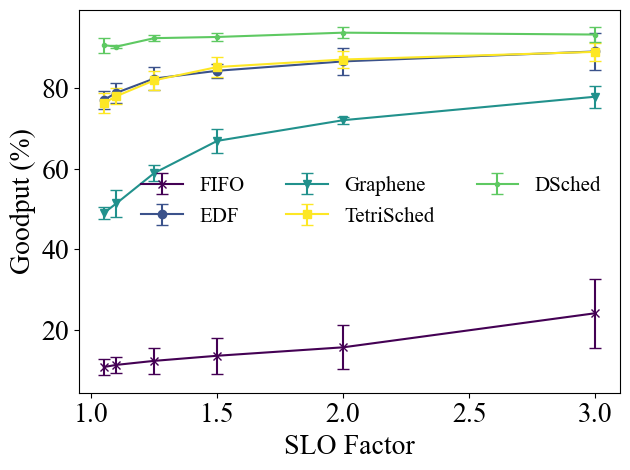

In [11]:
plt.figure(figsize=(6.4,4.8))
plot(slo_sweep_attainment_datapoints)
plt.legend(fontsize=15, frameon=False,ncol=3)
plt.xlabel("SLO Factor", fontsize=20)
plt.ylabel("Goodput (%)", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig("slo_sweep_attainment_rate.pdf", dpi=300, pad_inches=0)

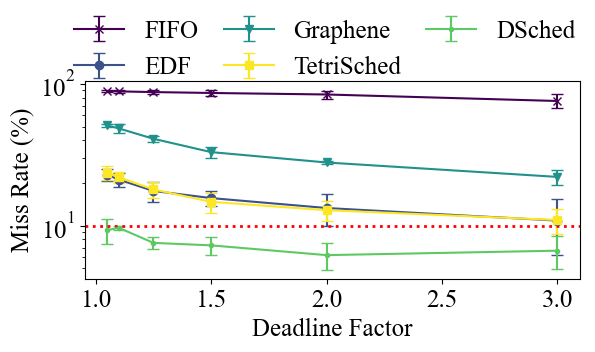

In [13]:
# fig = plt.figure(figsize=(6, 5))
# plt.figure(figsize=(6.4,4.8))
fig = plt.figure(figsize=(6,3))

plot(slo_sweep_miss_rate_datapoints)
# plt.xscale('log')
plt.yscale('log')
plt.axhline(y=10, color='r', linestyle=':', linewidth=2)
# plt.legend(fontsize=15, frameon=False,ncol=3, bbox_to_anchor=(0.3, 0.75),columnspacing=0.005)
plt.xlabel("Deadline Factor", fontsize=18)
plt.ylabel("Miss Rate (%)", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)

# fig.axes[0].get_legend_handles_labels()
lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

legend = fig.legend(lines, labels, fontsize=18, frameon=False,ncol=3, loc="upper center", bbox_to_anchor=(0.55, 1.2),columnspacing=1)

# Adjust the legend line positions
for col_idx, column in enumerate(legend.get_children()):
    for line_idx, legline in enumerate(column.get_children()):
        if isinstance(legline, plt.Line2D):
            line_data = legline.get_xydata()
            line_length = line_data[:, 0].max() - line_data[:, 0].min()
            x_offset = line_length * (line_idx - (len(column.get_children()) - 1) / 2) / (len(column.get_children()) - 1)
            legline.set_xdata([line_data[:, 0] + x_offset])
# fig.legend(lines[:4], labels[:4], fontsize=18, frameon=False,ncol=2, loc="upper right", bbox_to_anchor=(1, 0.9),columnspacing=0.007)
# fig.legend(lines[4:], labels[4:], fontsize=18, frameon=False,ncol=1, loc="upper left", bbox_to_anchor=(0.17, 0.89),columnspacing=0.005)

plt.tight_layout()
plt.savefig("slo_sweep_miss_rate.pdf", dpi=300, pad_inches=0, bbox_inches="tight")